# sklearn中的多项式回归和Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly  = PolynomialFeatures(degree=2) # degree表示最多添加几次幂，及多项式最多是几阶的

In [5]:
poly.fit(X)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [6]:
X2 = poly.transform(X) # 把数据转换为多次幂特征

In [7]:
X2[:5, :] # 第一列全为1，是X的0次方的意思

array([[ 1.        , -1.50903462,  2.27718548],
       [ 1.        , -0.76980751,  0.5926036 ],
       [ 1.        , -2.58021867,  6.65752837],
       [ 1.        , -0.83637636,  0.69952541],
       [ 1.        , -1.44108456,  2.07672471]])

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

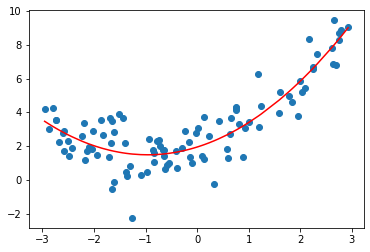

In [9]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r') # x排序了，y_predict2是一个x对应一个y,y应该按照x的索引顺序取值，所以要取x地argsort
plt.show()

In [10]:
lin_reg2.coef_

array([0.        , 0.95639248, 0.49821347])

In [11]:
lin_reg2.intercept_

1.9524804773271671

## 关于PolynomialFeatures

> PolynomialFeatures当幂数上升的时候回导致X的列数快速上升

In [12]:
X = np.arange(1, 11).reshape(-1, 2) # 10个数据调整为两列

In [13]:
X.shape

(5, 2)

In [15]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [14]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(x)

ValueError: Expected 2D array, got 1D array instead:
array=[-1.50903462 -0.76980751 -2.58021867 -0.83637636 -1.44108456  1.1871004
 -0.03005066  1.96357225 -2.78979042 -0.5830066   2.08999366 -0.92543042
  2.62819861  1.78548522  2.17217934 -0.53754199  0.74724986 -1.6912043
  0.80427435  2.68631254 -1.7011394  -2.6719392   0.93150688  2.04093694
 -2.42071391  2.6459576  -1.6154582  -1.39132684 -2.50744842 -2.72940299
  2.75407917 -2.48930861  2.24597073  0.64892546 -1.09201351  0.33563783
 -1.65410058  1.01318205  0.75581618 -0.15125711  2.7531708   1.60594032
 -0.9626239  -1.66734137 -2.01645779  0.08856818  0.02374559 -2.18946636
 -2.02984028  0.88145481 -0.71449939 -2.09604655 -0.74588886 -0.85652762
 -2.13342183 -0.38968061 -1.61583087 -1.29826742  0.7596498  -0.84244047
  1.24535684  2.33161033  1.20905055  0.23313807  1.98785157  0.13162611
 -1.82018853  2.92600163 -2.57269547  2.78525675  1.58597167 -0.30055422
 -1.94964469 -0.63720506 -0.64413972 -1.64844125 -1.25367174  0.57463308
 -0.10830324  1.84421659 -1.37315725  0.60325759 -2.17872441  2.60783737
 -2.95507168  0.64392306  0.14014099 -0.12991433 -1.36588555 -0.62626405
 -0.22774819  2.24387523 -1.85294295 -2.59178294 -2.74200336  0.41724616
 -2.86081278 -0.41600198 -2.23982393 -0.65490195].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## 使用sklearn中的Pipeline来完成多项式回归

In [12]:
'''重要'''
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [13]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

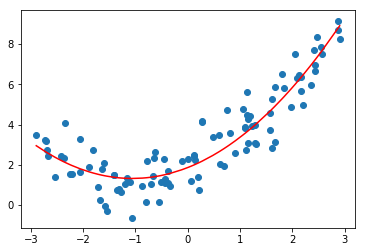

In [14]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()